In [23]:
import qiskit
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, transpile, assemble, QuantumRegister, ClassicalRegister
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import Operator, DensityMatrix, partial_trace


In [24]:
def sample_gcauchy(beta, M=1):
    cs = []
    # pdf = lambda u: 1/np.pi * 1/(1+(u/np.sqrt(2))**4) ~ C_{1/sqrt2}^4
    thresh = (1+np.sqrt(5))/2 # sup u of pdf(u)/cauchypdf(u) = golden ratio
    while len(cs) < M:
        c = scipy.stats.cauchy.rvs()
        u = scipy.stats.uniform.rvs()
        h = (1+c**2)/(1+(c/np.sqrt(2))**4)
        if u < h/thresh:
            cs.append(c)

    return beta*(np.array(cs) if M > 1 else cs[0])

In [29]:
def circ_ITE_pauli(qc: QuantumCircuit, anc_qbit, cbit, s, beta): 
    """s = pauli, circ for e^{-i beta s}"""
    n = len(s)
    for i in range(n-1):
        if s[i] == 'X':
            qc.h(i)
        elif s[i] == 'Y':
            qc.sdg(i)
            qc.h(i)
    for i in range(n-1):
        qc.cx(i, i+1)

    phi = 2*np.arccos(np.exp(-2*np.abs(beta)))
    qc.crx(phi, n-1, anc_qbit)
    qc.measure(anc_qbit, cbit)
    qc.reset(anc_qbit)

    for i in range(n-2, -1, -1):
        qc.cx(i, i+1)
    for i in range(n-2, -1, -1):
        if s[i] == 'X':
            qc.h(i)
        elif s[i] == 'Y':
            qc.h(i)
            qc.s(i)

    return qc

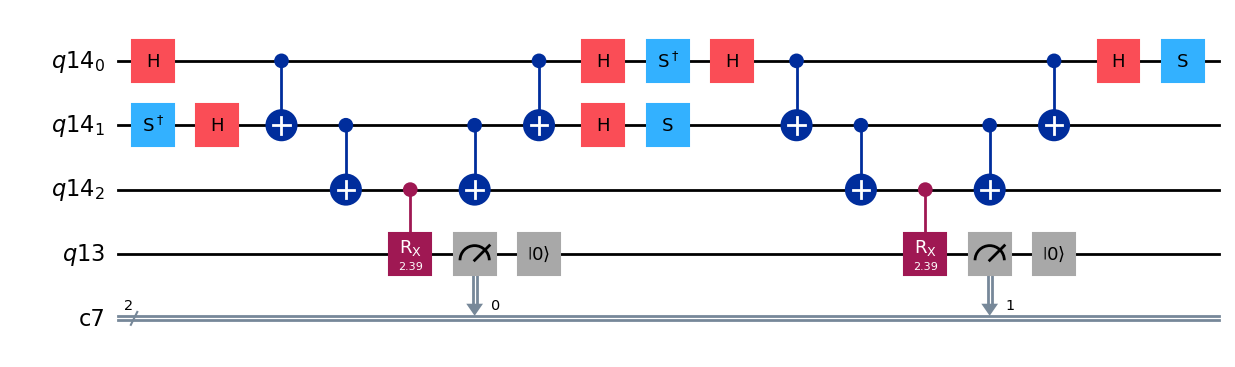

In [ ]:
n = 4
anc_qreg = QuantumRegister(1)
creg = ClassicalRegister(2)
qc = QuantumCircuit(QuantumRegister(n), anc_qreg, creg)
qc = circ_ITE_pauli(qc, anc_qreg[0], creg[0], 'XYZ', 0.5)
qc = circ_ITE_pauli(qc, anc_qreg[0], creg[1], 'YZY', 0.5)
qc.draw(output='mpl')